<a href="https://colab.research.google.com/github/Jishu-2004/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering/blob/main/Unsupervised_ML_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Uploading file on Colab


In [31]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/Unsupervised ML/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'


Mounted at /content/drive


##Reading and the file and displaying it

In [32]:
import pandas as pd

# Load dataset
df = pd.read_csv(file_path)

# Display as table
from IPython.display import display
display(df)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


##Informations and Analysis using graphs

In [33]:
# Importing Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# 1. Basic info
print("📄 Dataset Info:")
print(df.info())
print("\n🧼 Missing Values:\n", df.isnull().sum())



📄 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None

🧼 Missing Values:
 show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
l

In [12]:
# 2. Basic statistics
print("\n📊 Summary Statistics (for numeric columns):")
print(df.describe(include='all'))



📊 Summary Statistics (for numeric columns):
       show_id   type                                    title  \
count     7787   7787                                     7787   
unique    7787      2                                     7787   
top      s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
freq         1   5377                                        1   
mean       NaN    NaN                                      NaN   
std        NaN    NaN                                      NaN   
min        NaN    NaN                                      NaN   
25%        NaN    NaN                                      NaN   
50%        NaN    NaN                                      NaN   
75%        NaN    NaN                                      NaN   
max        NaN    NaN                                      NaN   

                      director                cast        country  \
count                     5398                7069           7280   
unique                  

In [235]:

# 3. Unique value counts
print("\n🔢 Unique Value Counts:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



🔢 Unique Value Counts:
show_id: 7787 unique values
type: 2 unique values
title: 7787 unique values
director: 4049 unique values
cast: 6831 unique values
country: 681 unique values
date_added: 1565 unique values
release_year: 73 unique values
rating: 14 unique values
duration: 216 unique values
listed_in: 492 unique values
description: 7769 unique values


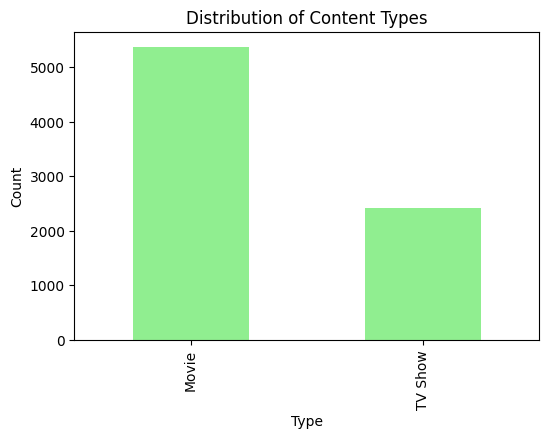

In [236]:

# 4. Top content types
plt.figure(figsize=(6, 4))
df['type'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Content Types')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()



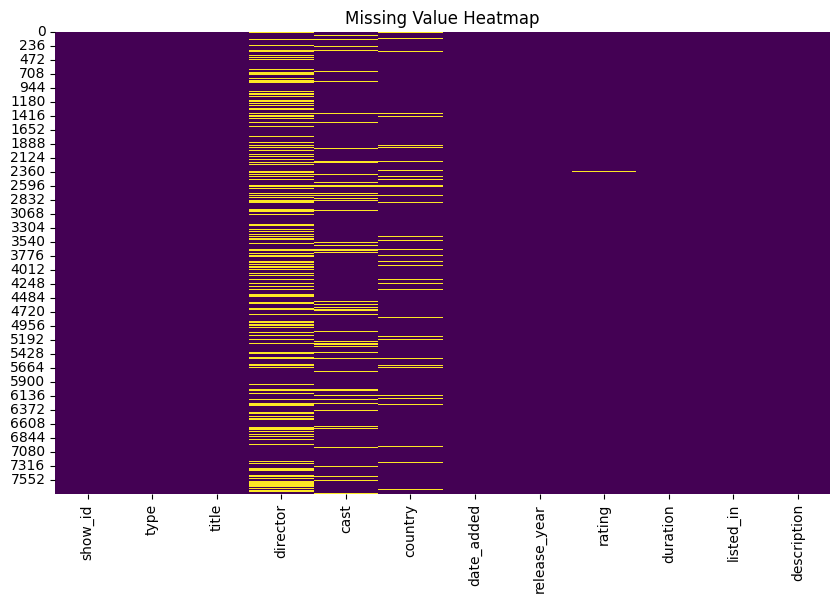

In [237]:
# 5. Missing value heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()



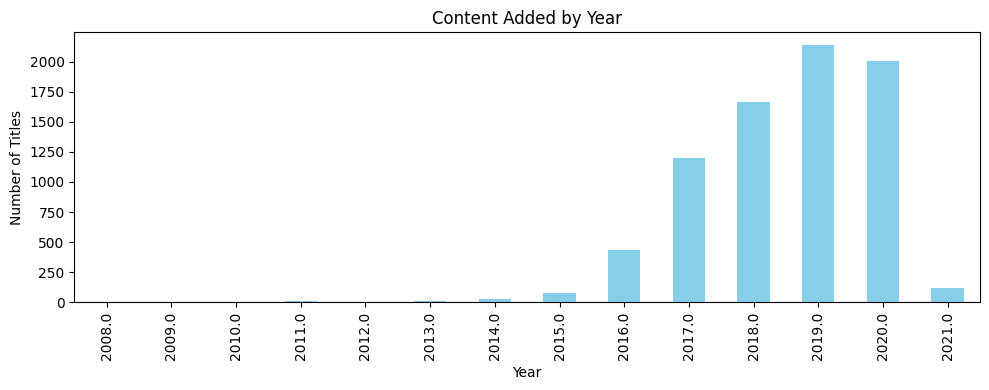

In [242]:
# 6. Content over time

# Check if the 'date_added' column is of type object (string) before stripping
if df['date_added'].dtype == 'object':
    df['date_added'] = df['date_added'].str.strip()

df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10, 4), color='skyblue')
plt.title('Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

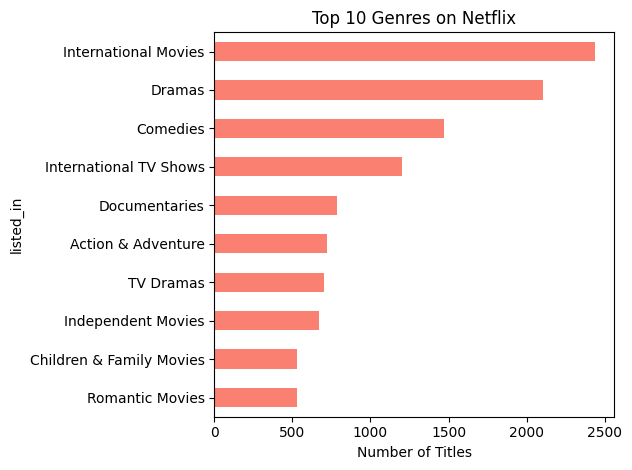

In [243]:
# 7. Top genres
df['listed_in'] = df['listed_in'].fillna('')
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)

top_genres.plot(kind='barh', color='salmon')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



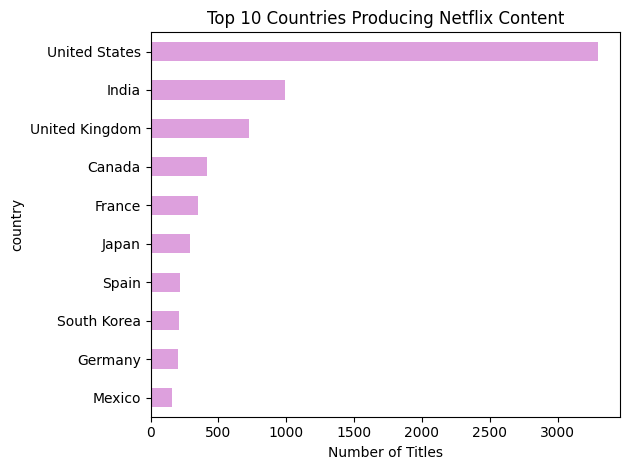

In [244]:
#8. Country-wise distribution
top_countries = df['country'].dropna().str.split(', ').explode().value_counts().head(10)
top_countries.plot(kind='barh', color='plum')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

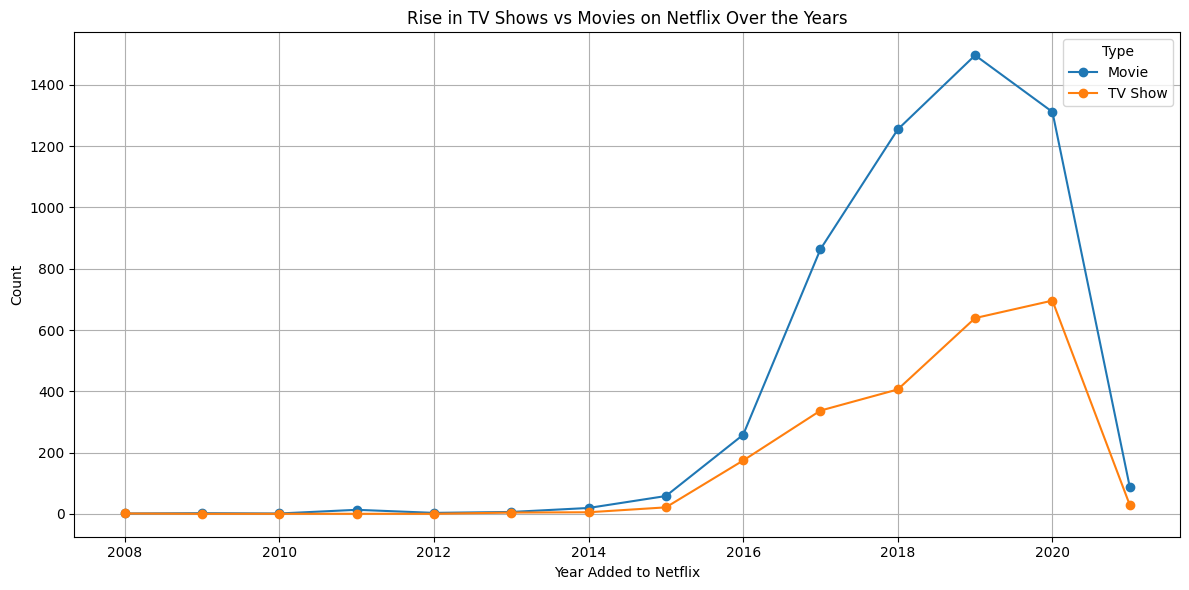

In [245]:
#Rise in TV Shows with respect to Movies

import matplotlib.pyplot as plt

# Convert date_added to datetime, handling errors and specifying format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', format='%B %d, %Y')

# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

# Drop rows with missing year
df = df.dropna(subset=['year_added'])

# Count of Movies and TV Shows added per year
content_count = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(12, 6))
content_count.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Rise in TV Shows vs Movies on Netflix Over the Years')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

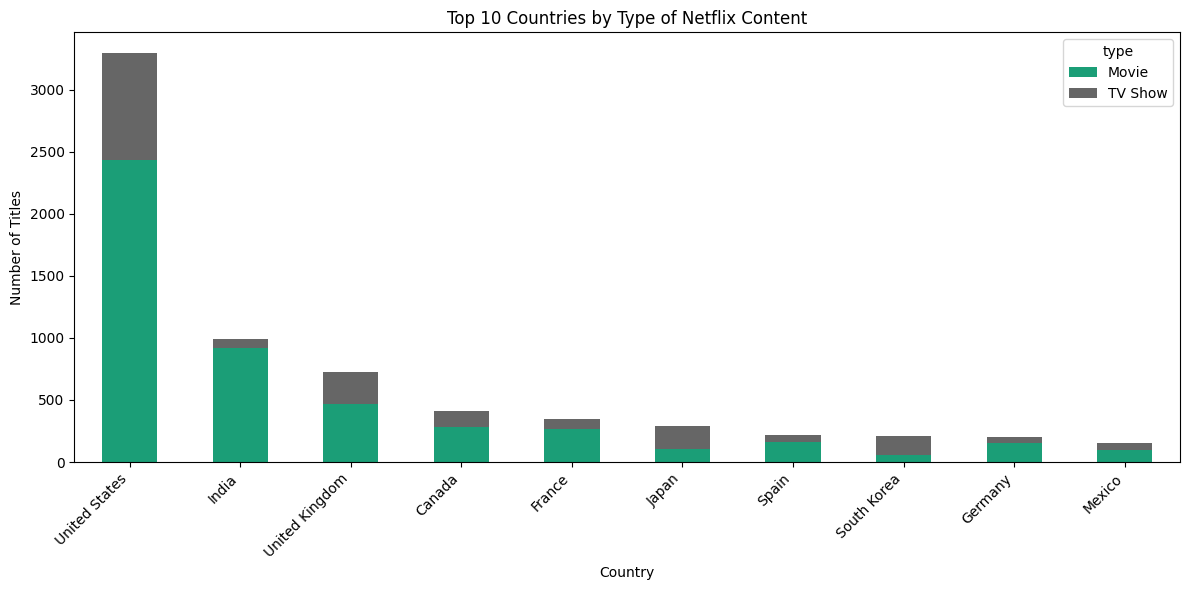

In [30]:
import matplotlib.pyplot as plt

# Drop missing countries/types
df = df.dropna(subset=['country', 'type'])

# Split multiple countries and explode
df['country'] = df['country'].str.split(', ')
df = df.explode('country')

# Group by country and type
country_type_counts = df.groupby(['country', 'type']).size().unstack(fill_value=0)

# Select top 10 countries by total content
top_countries = country_type_counts.sum(axis=1).sort_values(ascending=False).head(10)
top_country_data = country_type_counts.loc[top_countries.index]

# Plot
top_country_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Dark2')
plt.title('Top 10 Countries by Type of Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


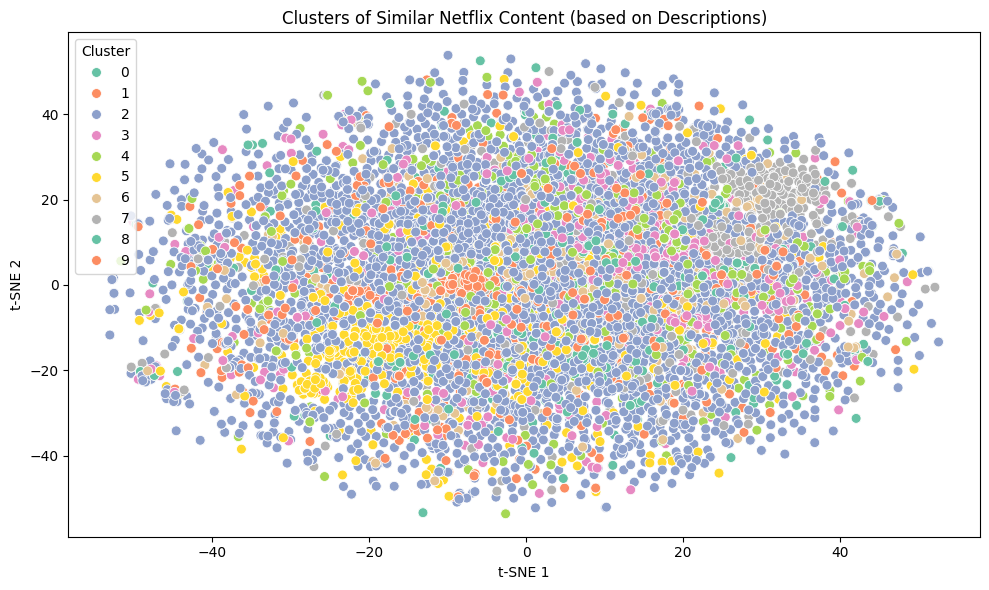

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


# Drop missing descriptions
df = df.dropna(subset=['description'])

# TF-IDF on 'description'
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['description'])

# K-Means clustering
k = 10  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Reduce dimensions for visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Add t-SNE results to dataframe
df['x'] = tsne_results[:, 0]
df['y'] = tsne_results[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='Set2', s=50)
plt.title('Clusters of Similar Netflix Content (based on Descriptions)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [16]:
# Inspect titles in each cluster
for cluster_num in range(k):
    cluster_titles = df[df['cluster'] == cluster_num]['title'].tolist()
    print(f"Cluster {cluster_num}:")
    print(cluster_titles[:30])  # Print top 30 titles in this cluster
    print("\n")


Cluster 0:
['24 Hours to Live', '24 Hours to Live', '24 Hours to Live', '37 Seconds', 'A Kid from Coney Island', 'A Kid from Coney Island', 'A Little Thing Called First Love', 'A Stoning in Fulham County', 'A Thousand Goodnights', 'Aaviri', 'Adú', 'Adam: His Song Continues', 'Ainori Love Wagon: African Journey', 'Ainori Love Wagon: Asian Journey', 'Ainsley Eats the Streets', 'Akame ga Kill!', 'All The Bright Places', 'Amy', 'Anchor Baby', 'Anchor Baby', 'André & his olive tree', "ARASHI's Diary -Voyage-", 'Azali', 'Badland', 'Be Here Now', 'Be Here Now', 'Beat Bugs: All Together Now', 'Beat Bugs: All Together Now', 'Before I Wake', "Being Elmo: A Puppeteer's Journey"]


Cluster 1:
['Çarsi Pazar', '10,000 B.C.', '10,000 B.C.', '3 Days to Kill', '3 Days to Kill', '3 Days to Kill', 'A Christmas Prince: The Royal Baby', 'A Flying Jatt', 'A Go! Go! Cory Carson Christmas', 'A Wrinkle in Time', 'A.I.C.O.', 'Albion: The Enchanted Stallion', 'Albion: The Enchanted Stallion', 'Always a Witch', '

In [34]:
from google.colab import drive
drive.mount('/content/drive')

file_path_Ext = '/content/drive/MyDrive/Colab Notebooks/Unsupervised ML/rotten_tomatoes_movies.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
ratings_df = pd.read_csv('rotten_tomatoes_movies.csv', encoding='latin1')  # or 'cp1252' or another suitable encoding
from IPython.display import display
display(ratings_df)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


In [19]:
import pandas as pd

# Clean and standardize titles for better matching
df['title_clean'] = df['title'].str.lower().str.strip()
ratings_df['title_clean'] = ratings_df['movie_title'].str.lower().str.strip()

# Merge datasets on 'title_clean'
merged_df = pd.merge(df, ratings_df, how='left', on=['title_clean'])

# Display all attributes (columns) of the merged dataset
print(merged_df.columns.tolist())  # Print column names

# To display the entire merged DataFrame, use:
# display(merged_df)  # Use this for interactive display (like in Jupyter)
# print(merged_df)    # Use this for printing to the console

# To display a specific number of rows, use:
print(merged_df.head(35))  # Display first 10 rows

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'cluster', 'x', 'y', 'title_clean', 'rotten_tomatoes_link', 'movie_title', 'movie_info', 'critics_consensus', 'content_rating', 'genres', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'runtime', 'production_company', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
   show_id     type                                title  \
0       s1  TV Show                                   3%   
1       s2    Movie                                 7:19   
2       s3    Movie                                23:59   
3       s4    Movie                                    9   
4       s5    Movie                                   21   
5       s6  TV Show

In [20]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.4 MB/s eta 0:00:00


In [21]:
import pandas as pd
from rapidfuzz import fuzz, process

# Clean and standardize titles for better matching
def clean_title(title):
    title = title.lower().strip()
    # You might need to add more cleaning steps based on your data
    return title

df['title_clean'] = df['title'].apply(clean_title)
ratings_df['title_clean'] = ratings_df['movie_title'].apply(clean_title)  # Assuming 'movie_title' in ratings_df

# Fuzzy matching using RapidFuzz
def get_best_match(title):
    match = process.extractOne(
        title, ratings_df['title_clean'], scorer=fuzz.token_sort_ratio, score_cutoff=80
    )
    return match[0] if match else None  # Return matched title or None

df['matched_title'] = df['title_clean'].apply(get_best_match)

# Merge based on matched titles
merged_df = pd.merge(df, ratings_df, left_on='matched_title', right_on='title_clean', how='left')

# Display results (optional)
print(merged_df.head(35))

   show_id     type                                title  \
0       s1  TV Show                                   3%   
1       s2    Movie                                 7:19   
2       s3    Movie                                23:59   
3       s4    Movie                                    9   
4       s5    Movie                                   21   
5       s6  TV Show                                   46   
6       s7    Movie                                  122   
7       s8    Movie                                  187   
8       s9    Movie                                  706   
9      s10    Movie                                 1920   
10     s11    Movie                                 1922   
11     s12  TV Show                                 1983   
12     s12  TV Show                                 1983   
13     s13  TV Show                                 1994   
14     s14    Movie                                2,215   
15     s15    Movie                     

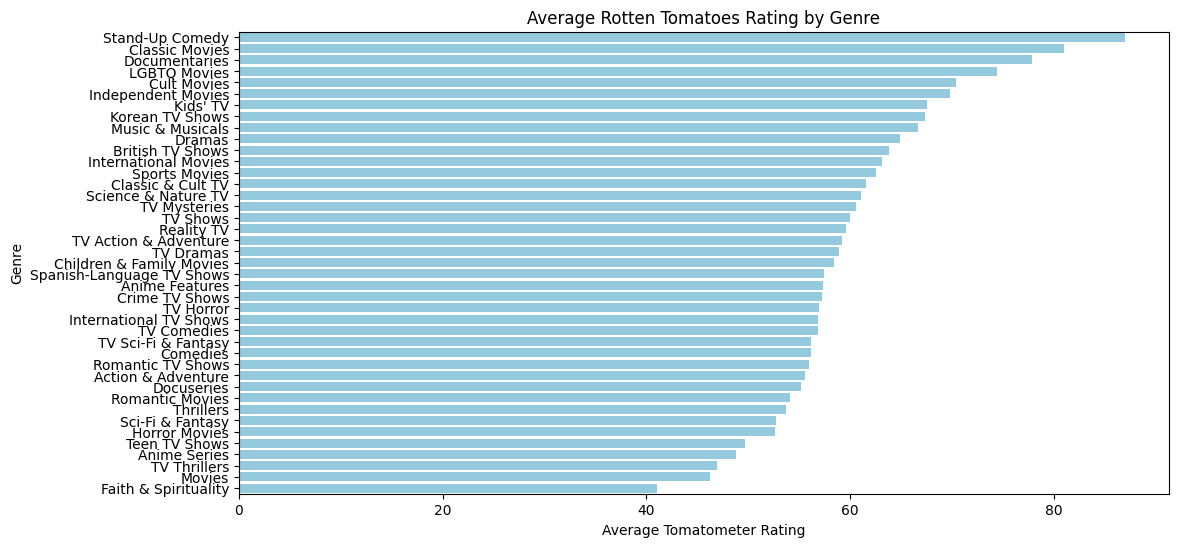

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your merged DataFrame is named 'merged_df'
# and the Rotten Tomatoes rating column is 'tomatometer_rating'
# and the genre column is 'listed_in'

# 1. Data Preparation:
merged_df = merged_df.dropna(subset=['tomatometer_rating', 'listed_in'])  # Drop rows with missing values
merged_df['tomatometer_rating'] = pd.to_numeric(merged_df['tomatometer_rating'], errors='coerce')

# 2. Split and Explode Genres:
merged_df['listed_in'] = merged_df['listed_in'].str.split(', ')  # Split genres by comma
merged_df = merged_df.explode('listed_in')  # Create separate rows for each genre

# 3. Group by Genre and Calculate Average Rating:
genre_ratings = merged_df.groupby('listed_in')['tomatometer_rating'].mean().sort_values(ascending=False)

# 4. Create Bar Plot:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x=genre_ratings.values, y=genre_ratings.index, orient='h', color='skyblue')
plt.title('Average Rotten Tomatoes Rating by Genre')
plt.xlabel('Average Tomatometer Rating')
plt.ylabel('Genre')
plt.show()

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Or use another regression model
from sklearn.metrics import mean_squared_error
from scipy.sparse import hstack, csr_matrix # Import csr_matrix

# ... (previous code for data loading and preprocessing)

# Create features and target variable
# Assuming 'description_features' and 'country_features' are created earlier
# description_features = ...
# country_features = ...

# Combine features using hstack for sparse matrices
X = hstack([description_features, country_features]) # Use hstack to combine sparse and dense features
# Convert X to csr_matrix for efficient indexing
X = X.tocsr() # Convert to csr_matrix before indexing

y = merged_df['tomatometer_rating']  # Use 'tomatometer_rating' as target

# Convert y to numeric, handling errors
y = pd.to_numeric(y, errors='coerce')  # Convert to numbers, invalid values become NaN

# Drop rows with missing target values
X = X[y.notna().values]  # Use .values to get the underlying NumPy array for indexing
y = y[y.notna()]  # Keep corresponding y values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()  # Or use another regression model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


def predict_success(title, description, country, genre):
    # 1. Create feature vectors for the input
    description_vector = tfidf.transform([description])

    # 2. One-hot encode country
    # Create a DataFrame with the country to maintain column name
    country_df = pd.DataFrame({'country': [country]})
    country_encoded = country_encoder.transform(country_df[['country']]) # Pass DataFrame with column name

    # 3. Combine features
    input_features = hstack([description_vector, country_encoded]).tocsr()

    # 4. Predict rating
    predicted_rating = model.predict(input_features)[0]

    return predicted_rating

# Get user input
title = input("Enter the movie title: ")
description = input("Enter the movie description: ")
country = input("Enter the country of origin: ")
genre = input("Enter the movie genre: ")  # Get genre input

# Make the prediction using the predict_success function
predicted_rating = predict_success(title, description, country, genre)

# Print the results
print(f"Predicted Tomatometer Rating for '{title}': {predicted_rating}")

if predicted_rating >= 85:
    print(title, "is a success!")
else:
    print(title, "is not successful")

Mean Squared Error: 1003.3658574429271
Enter the movie title: The Unjust Ruler
Enter the movie description: Old Time Rome, A cruel king used to rule. This is about how the people take him down
Enter the country of origin: United States
Enter the movie genre: Drama
Predicted Tomatometer Rating for 'The Unjust Ruler': 88.8091525319662
The Unjust Ruler is a success!


In [271]:
# Get user input
title = input("Enter the movie title: ")
description = input("Enter the movie description: ")
country = input("Enter the country of origin: ")
genre = input("Enter the movie genre: ")  # Get genre input

# Make the prediction using the predict_success function
predicted_rating = predict_success(title, description, country, genre)

# Print the results
print(f"Predicted Tomatometer Rating for '{title}': {predicted_rating}")

if predicted_rating >= 85:
    print(title, "is a success!")
else:
    print(title, "is not successful")


Enter the movie title: The Symphony of Stars
Enter the movie description: In a vibrant, futuristic metropolis, a gifted musician from the undercity discovers a hidden melody that holds the key to uniting their divided society. Facing prejudice and danger, they must embrace their unique talent and inspire a revolution of harmony, reminding everyone of the power of music to transcend boundaries and heal the deepest wounds. With breathtaking visuals, a soaring score, and a message of unity and hope, this epic tale will captivate audiences of all ages and ignite a spark of inspiration in their hearts.
Enter the country of origin: United States
Enter the movie genre: Drama
Predicted Tomatometer Rating for 'The Symphony of Stars': 117.57201867881537
The Symphony of Stars is a success!
